<a href="https://colab.research.google.com/github/DevuP1506/Cognorise-Internship-Tasks/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREAST CANCER PREDICTION.**

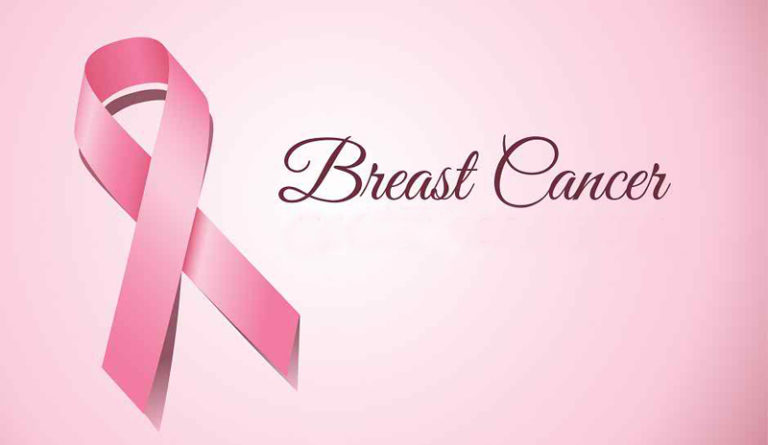

## PREFACE.

Breast cancer is a type of cancer that forms in the cells of the breasts. It is one of the most common cancers among women worldwide, although it can also occur in men. Early detection and treatment of breast cancer can significantly improve outcomes, highlighting the importance of effective screening and diagnosis methods.

Machine learning offers promising tools for breast cancer prediction and diagnosis. By analyzing large datasets of patient information and other relevant features, machine learning models can learn to identify patterns associated with breast cancer. These models can then be used to predict the likelihood of a patient having breast cancer, assist in diagnosis, and even help personalize treatment plans.

The Dataset is referred from Kaggle.The dataset includes various features representing cell nucleus characteristics with 33 columns and 569 corresponding values. The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous).

## CONTENT OVERVIEW.


### 1.   Preface.
### 2.   Data Inspection.
### 3.   Data Visualization and Preprocessing.
### 4.   Model Building.
### 5.   Model Evaluation.








### Importing Necessary Libraries.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

### Import Data.

In [48]:

df=pd.read_csv('/content/Breast data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## DATA INSPECTION.

In [49]:
#Get the First five rows of dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
#Get the last five rows of dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [51]:
#Get the Column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [52]:
#Display the datatypes
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [53]:
#Check for the null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [54]:
#Removing Unnecessary column 'Unnamed'
df.drop(['Unnamed: 32','id'],axis=1, inplace=True)


In [55]:
#Get the shape of data
df.shape

(569, 31)

In [56]:
#Get a quick statistical description of data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3. DATA VISUALIZATION AND PREPROCESSING.

In [57]:
label=LabelEncoder()
df['diagnosis']=label.fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


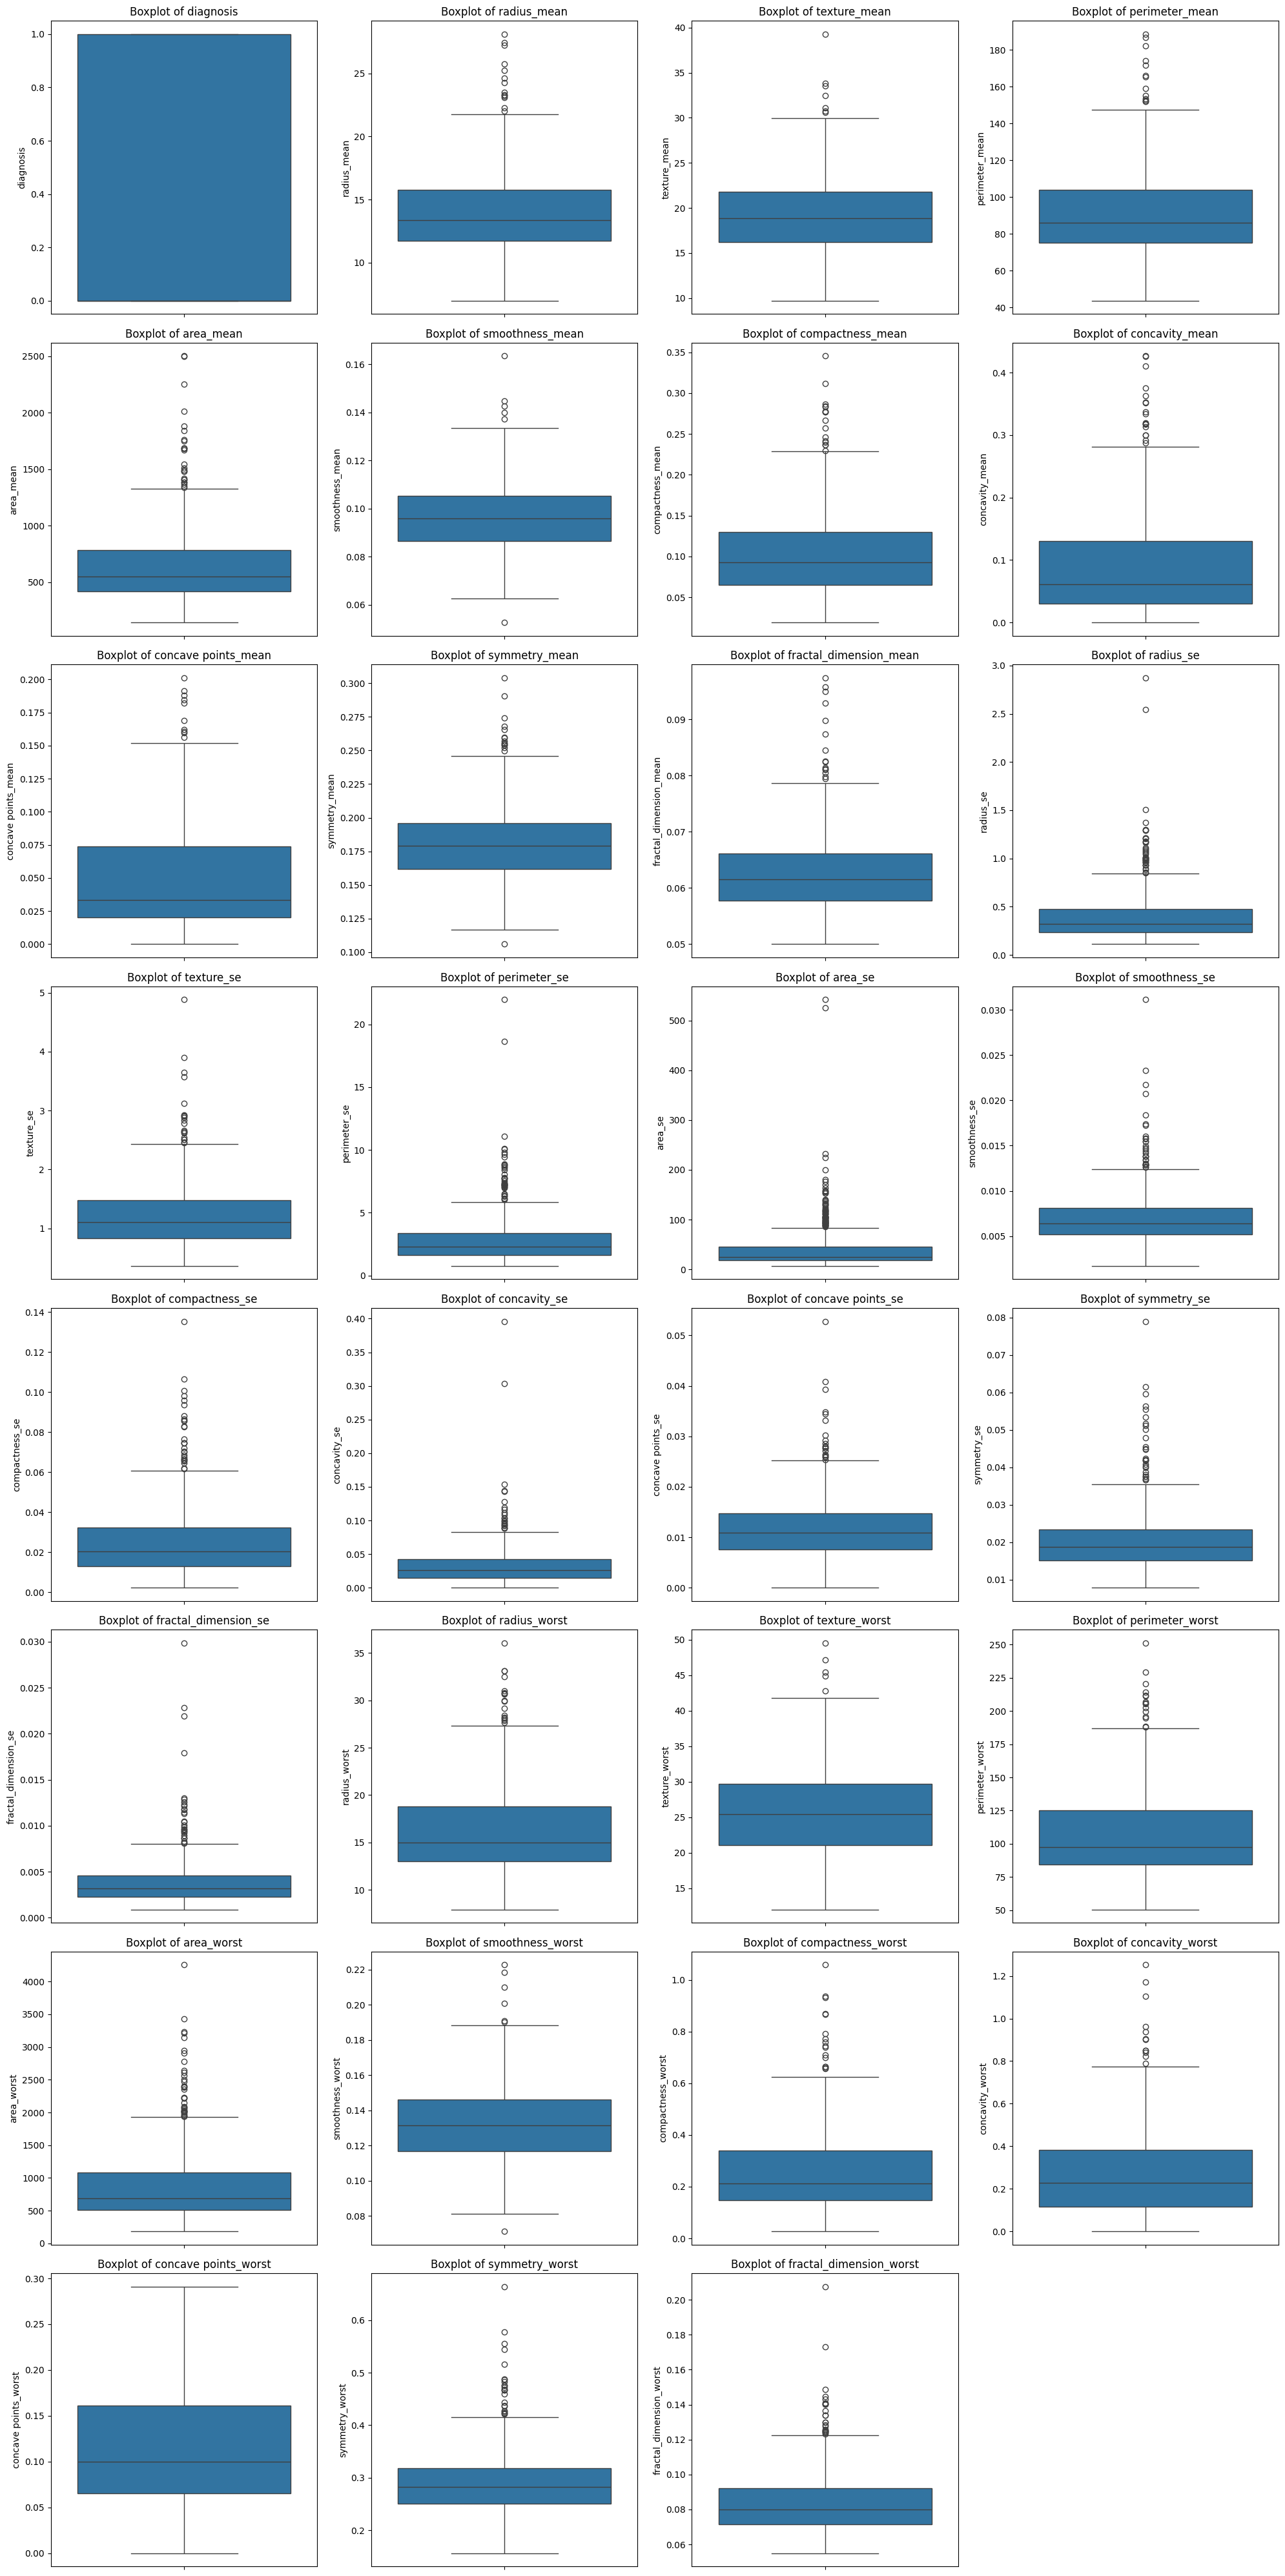

In [58]:
#Creating boxplot for checking the outliers

plt.figure(figsize=(20, 40))  # Adjust the figure size

for i, column in enumerate(df.columns[:31]):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [59]:
#Remove outliers using IQR
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df1 = df.loc[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

#Display the cleaned dataframe
        print("Cleaned dataframe:")
        df1
df1.reset_index(drop=True,inplace=False)

Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
541,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
542,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
543,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [60]:
#Get the Diagnosis count.
diagnosis_count=df1['diagnosis'].value_counts()
diagnosis_count

diagnosis
0    351
1    194
Name: count, dtype: int64

<ipython-input-61-93486c16397c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='diagnosis', palette=colors)


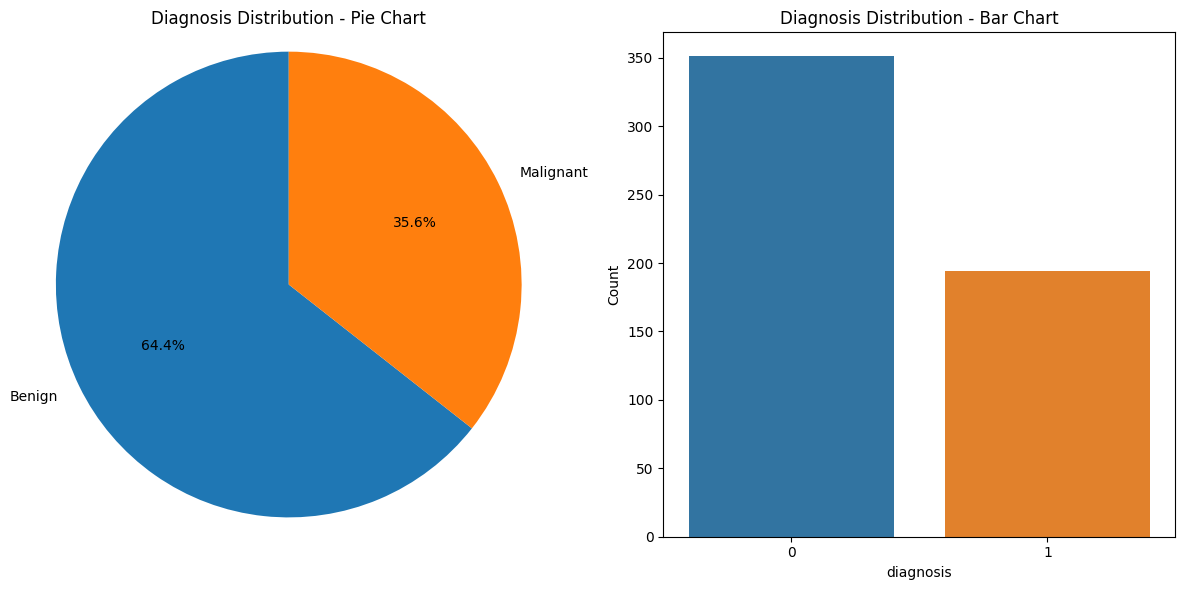

In [61]:
#Diagnosis Distribution

labels = ['Benign', 'Malignant']
colors = ['#1f77b4', '#ff7f0e']

# Pie chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(diagnosis_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Diagnosis Distribution - Pie Chart')

# Bar chart
plt.subplot(1, 2, 2)
sns.countplot(data=df1, x='diagnosis', palette=colors)
plt.title('Diagnosis Distribution - Bar Chart')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


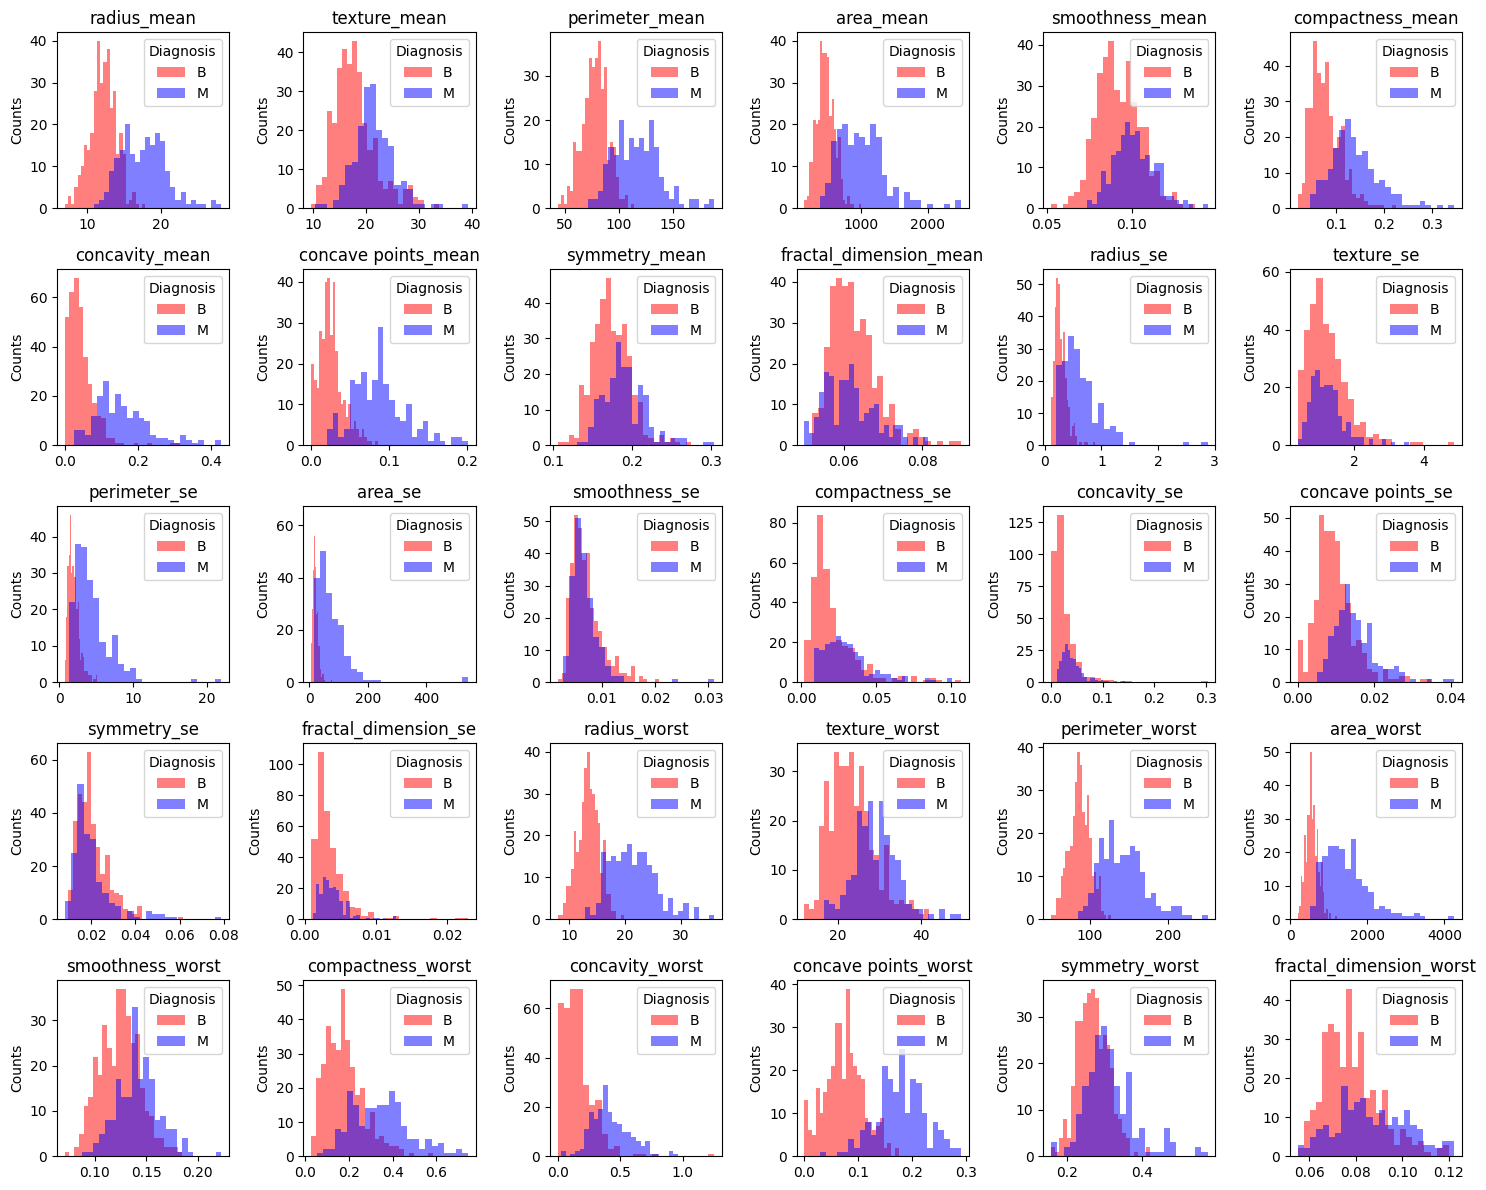

In [62]:
#Histogram of the data

x1 = df1.columns[1:]
y1 = 'diagnosis'


plt.figure(figsize=(15, 12))

for i, col in enumerate(x1):

    plt.subplot(5, 6, i+1).set_title(col)

    plt.hist(df1.loc[df[y1] == 0, col], label='B', color='red', alpha=0.5, bins=25)
    plt.hist(df1.loc[df[y1] == 1, col], label='M', color='blue', alpha=0.5, bins=25)

    plt.ylabel('Counts')
    plt.legend(title='Diagnosis',labels=['B', 'M'], loc='upper right')

plt.tight_layout()
plt.show()


### Feature Selection.

In [63]:
#Get the Correlation matrix
df1.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.749816,0.404242,0.758962,0.729719,0.342613,0.591747,0.705683,0.776258,0.310970,...,0.790049,0.438624,0.793858,0.749018,0.401380,0.600374,0.672317,0.788446,0.385208,0.294193
radius_mean,0.749816,1.000000,0.313007,0.998022,0.987320,0.204503,0.560930,0.725640,0.841397,0.171910,...,0.970105,0.295095,0.966634,0.940680,0.152377,0.503775,0.605720,0.778071,0.190903,0.043269
texture_mean,0.404242,0.313007,1.000000,0.316684,0.313039,-0.028619,0.219252,0.290206,0.279025,0.050310,...,0.341686,0.912565,0.343309,0.335965,0.071040,0.249395,0.276481,0.274661,0.069107,0.085250
perimeter_mean,0.758962,0.998022,0.316684,1.000000,0.986759,0.237460,0.607952,0.761293,0.866800,0.203173,...,0.969503,0.297845,0.971048,0.940915,0.178585,0.542386,0.637877,0.800738,0.210801,0.084518
area_mean,0.729719,0.987320,0.313039,0.986759,1.000000,0.210470,0.552970,0.734312,0.841973,0.174726,...,0.963612,0.288325,0.961149,0.959208,0.156066,0.480391,0.591094,0.755899,0.171150,0.040522
smoothness_mean,0.342613,0.204503,-0.028619,0.237460,0.210470,1.000000,0.631961,0.509104,0.549808,0.531422,...,0.236510,0.020462,0.260611,0.231579,0.792048,0.443386,0.410063,0.487519,0.349838,0.457735
compactness_mean,0.591747,0.560930,0.219252,0.607952,0.552970,0.631961,1.000000,0.892747,0.844669,0.566547,...,0.577898,0.210728,0.631487,0.553388,0.513391,0.871426,0.812471,0.810854,0.447586,0.649779
concavity_mean,0.705683,0.725640,0.290206,0.761293,0.734312,0.509104,0.892747,1.000000,0.934503,0.463842,...,0.726999,0.276823,0.766398,0.715444,0.421834,0.783390,0.895115,0.865082,0.370700,0.478059
concave points_mean,0.776258,0.841397,0.279025,0.866800,0.841973,0.549808,0.844669,0.934503,1.000000,0.446058,...,0.842759,0.275599,0.867116,0.822796,0.441166,0.713825,0.785894,0.913819,0.354777,0.365447
symmetry_mean,0.310970,0.171910,0.050310,0.203173,0.174726,0.531422,0.566547,0.463842,0.446058,1.000000,...,0.200571,0.055551,0.230288,0.193629,0.383413,0.428472,0.383583,0.398734,0.684388,0.376383


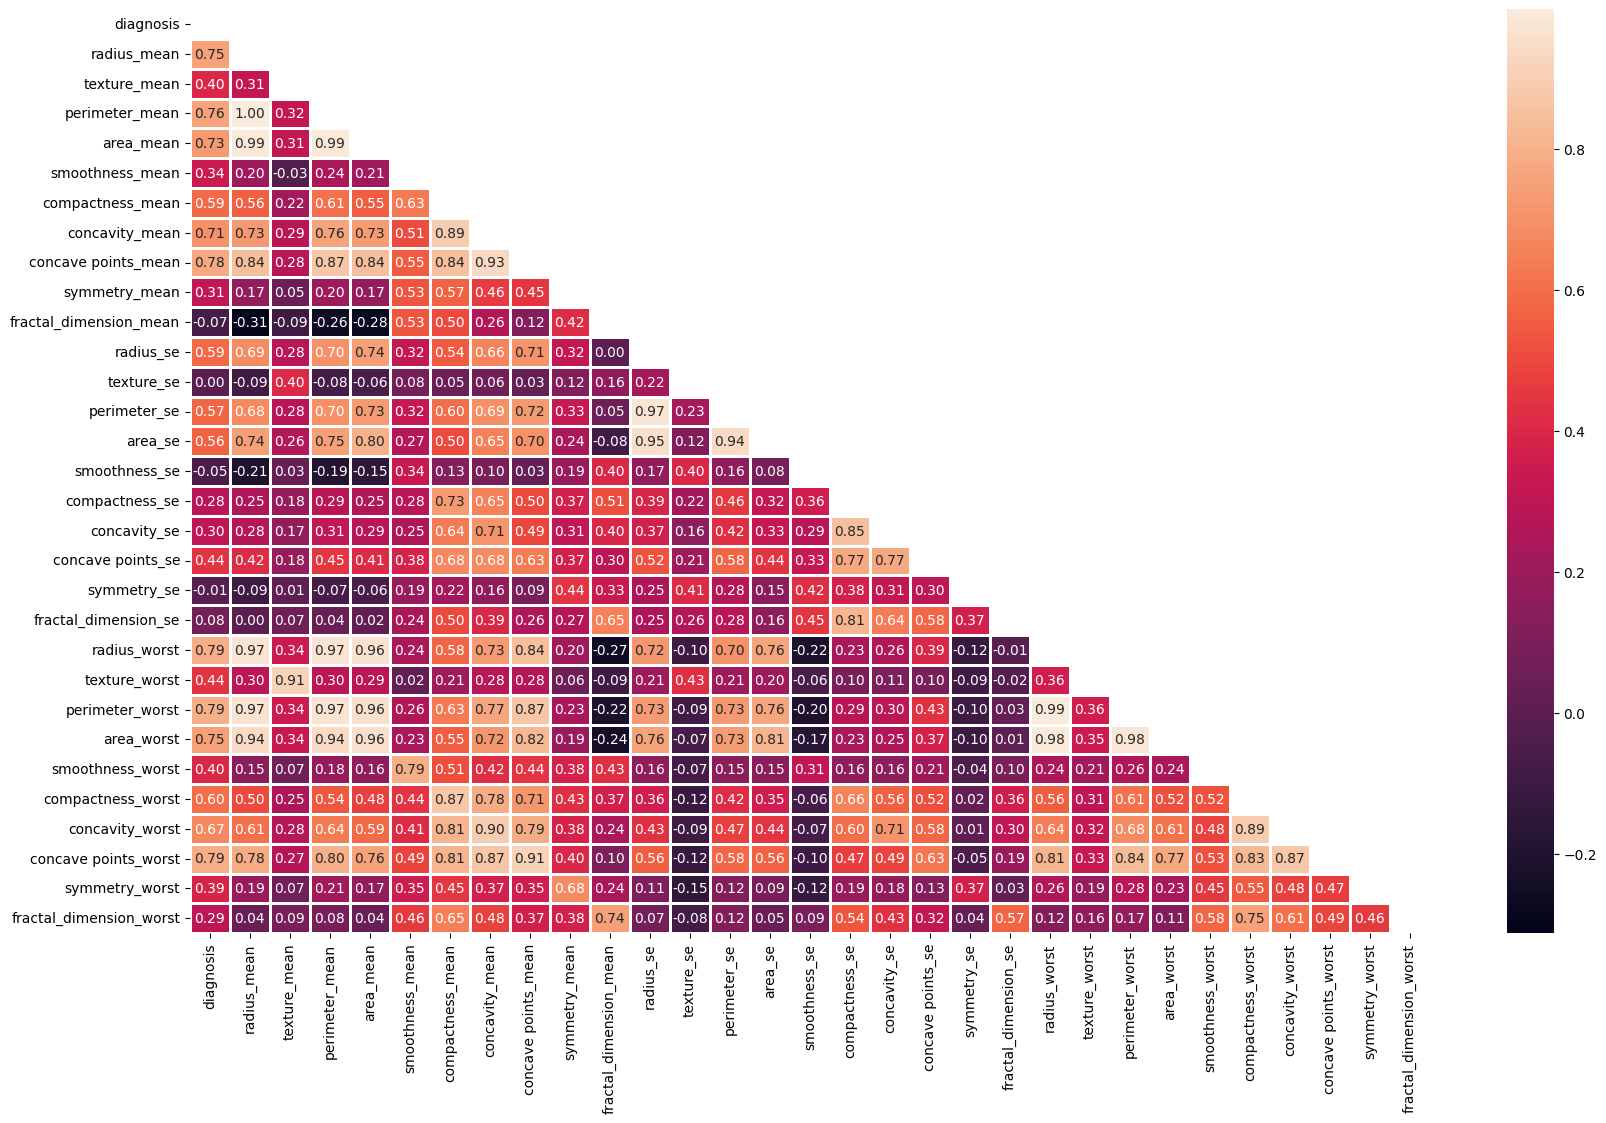

In [64]:
#Heatmap to check the correlation
plt.figure(figsize=(20, 12))
corr=df1.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [65]:
#Check for multicollinearity and remove the highly correlated features

cor_matrix=df.corr().abs()
mask=np.triu(np.ones_like(cor_matrix, dtype=bool))
triangular_df=cor_matrix.mask(mask)
feature_drop=[x for x in triangular_df.columns if any(triangular_df[x]>0.95)]
feature_drop



['radius_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'radius_worst',
 'perimeter_worst']

In [66]:
#Dropping the features
df1 = df1.drop(feature_drop, axis=1)
df1.reset_index(drop=True, inplace=True)
df1

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,8.589,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,3.398,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,4.585,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,5.438,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,1,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.7732,3.180,...,0.01369,0.002179,27.66,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,25.09,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,1.0260,8.758,...,0.02057,0.006213,29.41,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
541,1,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,7.673,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
542,1,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,5.203,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
543,1,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,3.425,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [67]:
#Splitting Training and Testing data
x=df1.iloc[:,1:26].values
x


array([[10.38   ,  0.1184 ,  0.2776 , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [17.77   ,  0.08474,  0.07864, ...,  0.186  ,  0.275  ,  0.08902],
       [21.25   ,  0.1096 ,  0.1599 , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [28.25   ,  0.0978 ,  0.1034 , ...,  0.1628 ,  0.2572 ,  0.06637],
       [28.08   ,  0.08455,  0.1023 , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [24.54   ,  0.05263,  0.04362, ...,  0.     ,  0.2871 ,  0.07039]])

In [68]:
y=df1.iloc[:,0].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[15.39   ,  0.09639,  0.06889, ...,  0.08476,  0.2676 ,  0.06765],
       [22.72   ,  0.06935,  0.1073 , ...,  0.1092 ,  0.2191 ,  0.09349],
       [23.21   ,  0.101  ,  0.1318 , ...,  0.1825 ,  0.2576 ,  0.07602],
       ...,
       [19.96   ,  0.0802 ,  0.1181 , ...,  0.09314,  0.2955 ,  0.07009],
       [17.15   ,  0.08583,  0.0543 , ...,  0.09851,  0.327  ,  0.0733 ],
       [19.65   ,  0.07837,  0.2233 , ...,  0.1505 ,  0.2398 ,  0.1082 ]])

### Feature Scaling.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.85739393,  0.06325246, -0.6289839 , ..., -0.37704891,
        -0.29711043, -0.98023119],
       [ 0.85399289, -1.98342627,  0.17623146, ...,  0.01164791,
        -1.17495939,  0.89685788],
       [ 0.96839664,  0.41218697,  0.68984188, ...,  1.1774203 ,
        -0.47811022, -0.37221124],
       ...,
       [ 0.20959621, -1.16218129,  0.40263931, ..., -0.24377234,
         0.20787897, -0.80298284],
       [-0.44647431, -0.73604219, -0.93484414, ..., -0.15836719,
         0.77802829, -0.56979956],
       [ 0.13721833, -1.30069542,  2.60801956, ...,  0.66848829,
        -0.80028984,  1.96543297]])

In [71]:
x_test

array([[-0.00987222, -0.9404073 , -1.19227826, ..., -1.09162126,
        -0.51793017, -0.65915016],
       [ 0.5598118 , -0.08434456,  0.01208576, ...,  0.22317278,
         0.32552883, -0.92139055],
       [-0.91342842, -0.97446815, -0.49083318, ..., -0.04878776,
         0.98979804,  1.10679548],
       ...,
       [ 0.7185762 , -0.35228993,  0.75273295, ...,  1.32850949,
         0.12461906, -1.63401608],
       [-0.96479338, -1.10314248, -0.28098663, ...,  0.0991206 ,
        -0.27539046,  0.11522172],
       [-0.06123717, -0.52259419, -0.14828647, ...,  0.6191855 ,
        -0.05457072, -0.64389518]])

In [72]:
y_train

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [73]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

### Model Building.

In [74]:
l_model=LogisticRegression()
k_model=KNeighborsClassifier(n_neighbors=7)
g_model=GaussianNB()
s_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(criterion='entropy')
x_model=XGBClassifier()
lst_model=[l_model,k_model,g_model,s_model,d_model,r_model,x_model]

Model name is LogisticRegression()
*****************
[[100   1]
 [  3  60]]
Acuracy score is LogisticRegression()
0.975609756097561
Model name is KNeighborsClassifier(n_neighbors=7)
*****************
[[99  2]
 [ 9 54]]
Acuracy score is KNeighborsClassifier(n_neighbors=7)
0.9329268292682927
Model name is GaussianNB()
*****************
[[98  3]
 [ 6 57]]
Acuracy score is GaussianNB()
0.9451219512195121
Model name is SVC()
*****************
[[100   1]
 [  8  55]]
Acuracy score is SVC()
0.9451219512195121
Model name is DecisionTreeClassifier(criterion='entropy')
*****************
[[99  2]
 [ 7 56]]
Acuracy score is DecisionTreeClassifier(criterion='entropy')
0.9451219512195121
Model name is RandomForestClassifier(criterion='entropy')
*****************
[[100   1]
 [  4  59]]
Acuracy score is RandomForestClassifier(criterion='entropy')
0.9695121951219512
Model name is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
   

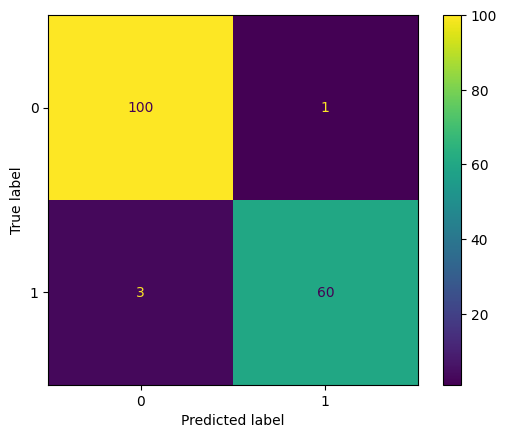

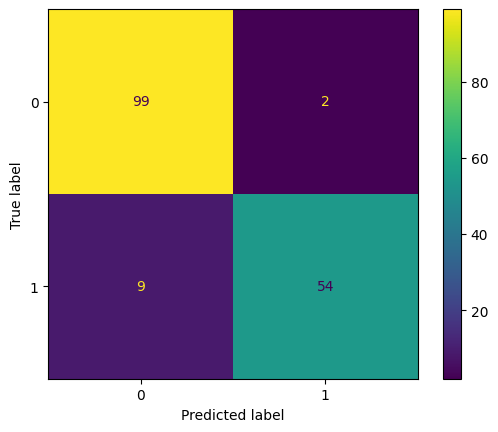

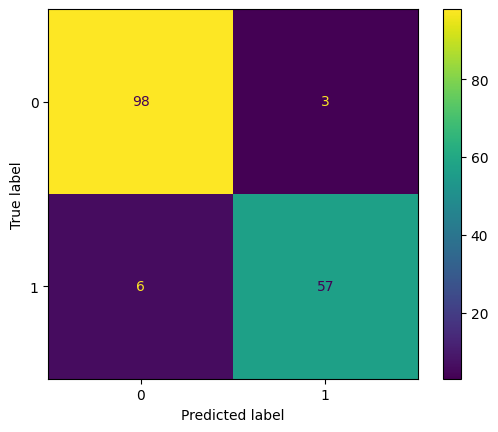

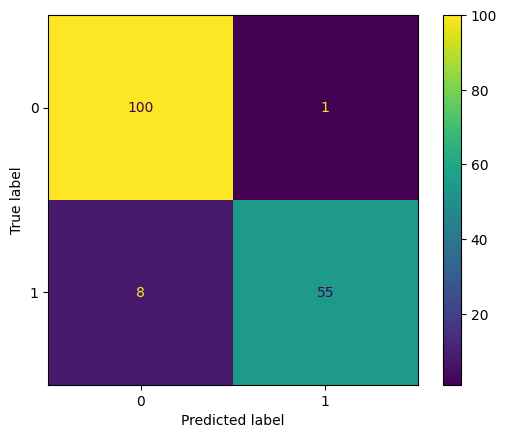

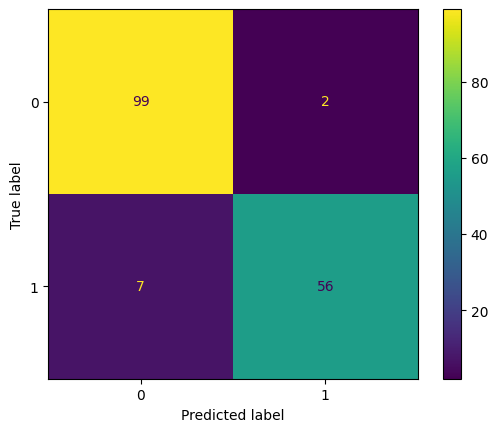

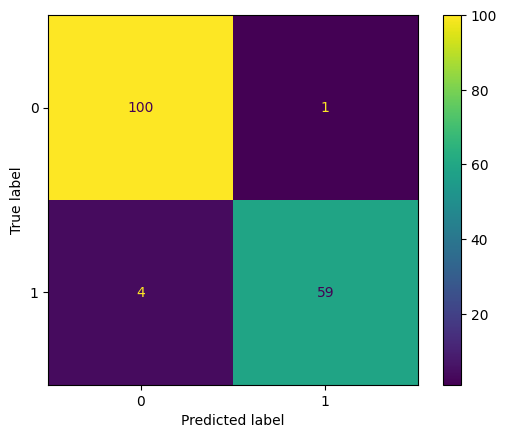

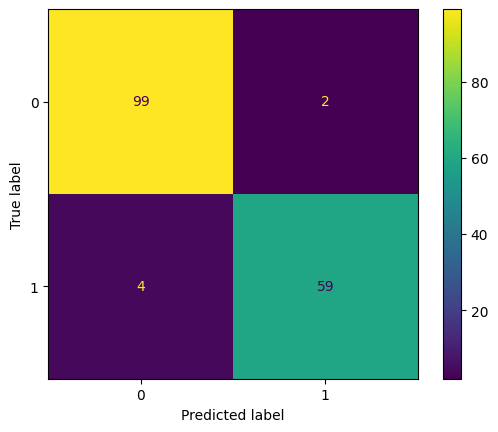

In [75]:
for i in lst_model:
  print("Model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*****************")
  matrix=confusion_matrix(y_test,y_pred)
  print(matrix)
  label=[0, 1]
  dis=ConfusionMatrixDisplay(matrix,display_labels=label)
  dis.plot()
  print("Acuracy score is",i)
  score=accuracy_score(y_test,y_pred)
  print(score)

In [76]:
r_model.fit(x_train,y_train)
y_pred1=l_model.predict(x_test)
y_pred1

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

### Model Evaluation.

In [77]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       103
           1       0.95      0.98      0.97        61

    accuracy                           0.98       164
   macro avg       0.97      0.98      0.97       164
weighted avg       0.98      0.98      0.98       164



### Ploting Bar chart of Algorithms with their accuracy score.

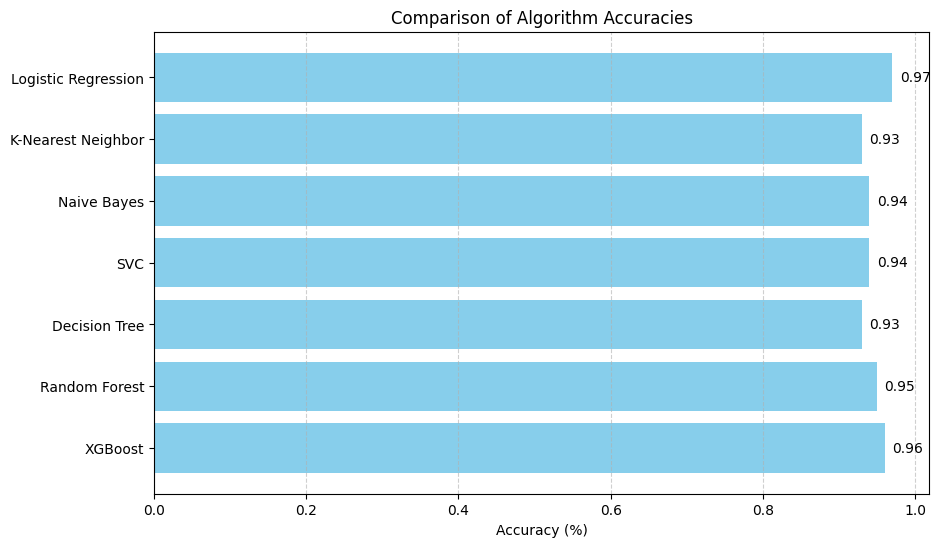

In [78]:

import matplotlib.pyplot as plt

Algorithms = ['Logistic Regression', 'K-Nearest Neighbor', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest', 'XGBoost']
Accuracy = [0.97, 0.93, 0.94, 0.94, 0.93, 0.95, 0.96]

plt.figure(figsize=(10, 6))
plt.barh(Algorithms, Accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Algorithm Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

for i, v in enumerate(Accuracy):
    plt.text(v + 0.01, i, str(v), color='black', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()





### CONCLUSION.
About 67% of tumors are malignant (cancerous) and 35% are benign(non-cancerous).
Among the 7 models created, Logistic Regression outshines the other model with accuracy of 97%.